# Test of the Ben Sira package

*Project realised by Mayank Mishra, Prunelle Daudré--Treuil and Shehenaz Hossain*

**For the Ben Sira variant analysis Project for the NLP Master of the Lorraine University (2023), under the supervision of J.S. Ray and S.Robert** 


## Import :

In [1]:
from pkg.Variant import VariantsFinder
from pkg.Witness import Witness
from pkg.Stats import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

2023-06-22 22:59:06 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-06-22 22:59:10 INFO: Loading these models for language: he (Hebrew):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2023-06-22 22:59:10 INFO: Use device: cpu
2023-06-22 22:59:10 INFO: Loading: tokenize
2023-06-22 22:59:10 INFO: Loading: mwt
2023-06-22 22:59:10 INFO: Loading: pos
2023-06-22 22:59:11 INFO: Loading: lemma
2023-06-22 22:59:11 INFO: Loading: depparse
2023-06-22 22:59:11 INFO: Done loading processors!
[nltk_data] Downloading package punkt to /home/mari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Constantes :

To update depending of the manuscript :

In [2]:
UNWANTED_TAGS = ["folio","verse_nb","line","vacat_car","greek","reconstructed","superscript",\
                    "supralinear","margin_reconstructed","margin_car","margin_infralinear",\
                    "margin_supralinear","Article"]

TO UNDERSTAND THE XML FILES :

                <!ELEMENT folio (#PCDATA)> <!-- shelfmark of the manuscript and folio number -->
                <!ELEMENT verse_nb (#PCDATA)> <!-- verse (children of chapter) -->
                <!ELEMENT line (#PCDATA)> <!-- line on the manuscript -->
                <!ELEMENT vacat_car (#PCDATA)> <!-- a space into the manuscript -->
                <!ELEMENT greek (#PCDATA)> <!-- greek word or letter -->
                <!ELEMENT reconstructed (#PCDATA)> <!-- Hebrew reconstructed -->
                <!ELEMENT superscript (#PCDATA)> <!-- Hebrew superscript letters or words -->
                <!ELEMENT supralinear (#PCDATA)> <!-- Hebrew supralinear letters or words (I think = superscript) -->
                <!ELEMENT margin_reconstructed (#PCDATA)> <!-- marginal notation reconstructed -->
                <!ELEMENT margin_car (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_infralinear (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_supralinear (#PCDATA)> <!-- marginal notation -->

## Exemples :

In [3]:
fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]
folder = "WorkDir/"

First we create a `VariantsFinder` object. At this creation, the object will match all chapters and verses, clean the verses and compute the collations and the distances for each verses :

In [4]:
vf = VariantsFinder(fileNames, UNWANTED_TAGS, folder = folder)

# Matching Done
## Cleaning Done
### Collation Done
#### Distance Done
##### Errors Classification Done
###### Part Of Speech Tagging Done


We give a random exemple. It is important to note that the representation use here is simple_SVG, the normal SVG generating a lot of unwanted errors.

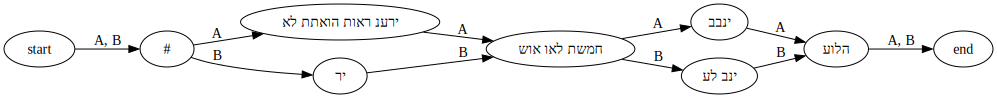

In [5]:
vf.getSampleVariant()

The following exemple will run on the first witness, to test the different representation.

In [6]:
test = vf.witnesses[1]
print(test)

Verse 26 : aligned
+---+-----+-------+-------+----------+------------+
| A |  אַל | תתחכם | לעבד  | חפצך ואל | תתכעת צרכך |
| B | אל  | תתחכם | לעשות | חפצך ואל | תתכב       |
+---+-----+-------+-------+----------+------------+


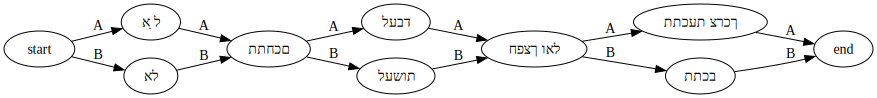

In [7]:
test.getSVG()

In [8]:
test.getHTML()

A,אַל,תתחכם,לעבד,חפצך ואל,תתכעת צרכך
B,אל,תתחכם,לעשות,חפצך ואל,תתכב


In [9]:
print(test.getCSV())

A, אַל ,תתחכם ,לעבד ,חפצך ואל ,תתכעת צרכך 
B,אל ,תתחכם ,לעשות ,חפצך ואל ,תתכב



The following exemple show the DataFrame of the `VariantsFinder` object.

In [10]:
df = vf.getDF()
df

,Verse A,Verse B,Variant A,Variant B,Length A,Length B,Manuscript A,Manuscript B,Chapter A,Chapter B,Verse,Levenshtein,Hamming,Inversion,Difference,POS A,POS B
0,ש מושל ושופט נכבדו ואן גדול מרא אלהים,שר שופט ומושל נכבדו וא גד,"[, ש, מושל, ושופט, ואן, גדול, מרא, אלהים]","[שר, שופט, ומושל, וא, גד]",1,1,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,24,17,22,None,+ שר\n- ש\n- מושל\n- ושופט\n? -\n\n+ שופט\n+ ו...,"ש : SCONJ,מושל : NOUN,ו : PRON,שופט : NOUN,ו :...","שר : NOUN,שופט : NOUN,ו : CCONJ,מושל : NOUN,וא..."
1,אַל תתחכם לעבד חפצך ואל תתכעת צרכך,אל תתחכם לעשות חפצך ואל תתכב,"[, א, ַ, ל, לעבד, תתכעת, צרכך]","[אל, לעשות, תתכב]",1,1,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,26,8,11,None,- אַל\n? -\n\n+ אל\n תתחכם\n- לעבד\n+ לעשות\...,"א : PROPN,ַ : CCONJ,ל : ADP,לעבד : VERB,תתכעת ...","אל : ADV,לעשות : VERB,תתכב : VERB,"
2,אין לבזות דל משכיל ואין לכבד כל איש כם,אין לבזות דל משכיל ואין לכבד כל איש חמס,"[, כם]",[חמס],1,1,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,23,3,3,None,אין\n לבזות\n דל\n משכיל\n ואין\n לכבד\...,"כם : PRON,","חמס : PROPN,"
3,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,"[, נכבד]","[הנכבד, בעיניו, בעשרו]",1,1,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,31,12,16,None,- נכבד\n+ הנכבד\n? +\n\n+ בעיניו\n בעשרו\n א...,"נכבד : ADJ,","ה : DET,נכבד : VERB,ב : ADP,עיני : NOUN,ו : PR..."
4,בין אחים ראשם נכבד וירא אלהים בעינ,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,"[, בעינ]","[נכבד, ממנו]",1,1,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,20,6,8,None,בין\n אחים\n ראשם\n נכבד\n וירא\n אלהים...,"בעינ : ADP,","נכבד : VERB,ממנ : ADP,ו : PRON,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,אוהב שונא תחת כל יצהל,כסוס מוכן אוהב שונא תחת כל אוהב יצהל,[],"[כסוס, מוכן, אוהב]",0,1,ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,6,12,12,None,+ כסוס\n+ מוכן\n אוהב\n שונא\n תחת\n כל\n+...,,"כ : ADP,סוס : NOUN,מוכן : ADJ,אוהב : VERB,"
149,ל לב נבל ואופן חוזר מחשבותיו,גלגל קל לב נבל ואופן חוזר מחשבותיו,[ל],"[גלגל, קל]",1,1,ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,5,5,6,None,- ל\n+ גלגל\n+ קל\n לב\n נבל\n ואופן\n חוז...,"ל : ADP,","גלגל : NOUN,קל : ADJ,"
150,מת בחכמת ייי נשפטו ויש מהם מועד,אבל בחכמת ייי נשפטו ויש מהם מוע,"[מת, מועד]","[אבל, מוע]",1,1,ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,8,4,6,None,- מת\n+ אבל\n בחכמת\n ייי\n נשפטו\n ויש\n ...,"מת : VERB,מועד : NOUN,","אבל : CCONJ,מוע : NOUN,"
151,ם יום כי כלו אור שנה על שמש,מה על יום יום כי כלו אור שונה על שמש,"[ם, שנה]","[מה, על, יום, שונה]",1,1,ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,7,7,11,None,- ם\n+ מה\n+ על\n+ יום\n יום\n כי\n כלו\n ...,"ם : PRON,שנה : NOUN,","מה : PRON,על : ADP,יום : NOUN,שונה : ADJ,"


Finally, here is an exemple of the mardown and csv export. By default, the variants are saved under the files `"Variants.md"` and `"Variants.csv"`.

In [11]:
vf.getCSV()
vf.getMarkdown()

## Statistiques :
First let's split the dataframe by Manuscript A.

In [12]:
dfs = []
for file in fileNames:
    dfs.append((file, subdataframe_enhancer(df, file)))

Now, we can create some exemple of what we can do with the `"Stats.py"` files :

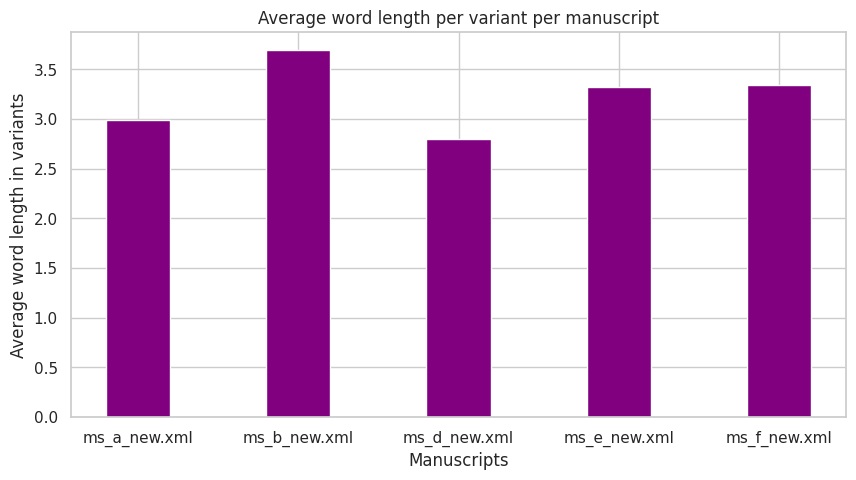

In [13]:
# creating the dataset
data = {file:avg_word_len(df) for file, df in dfs}
manuscripts = list(data.keys())
avg_variant_word_len = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(manuscripts, avg_variant_word_len, color ='purple',
        width = 0.4)
 
plt.xlabel("Manuscripts")
plt.ylabel("Average word length in variants")
plt.title("Average word length per variant per manuscript")
plt.show()

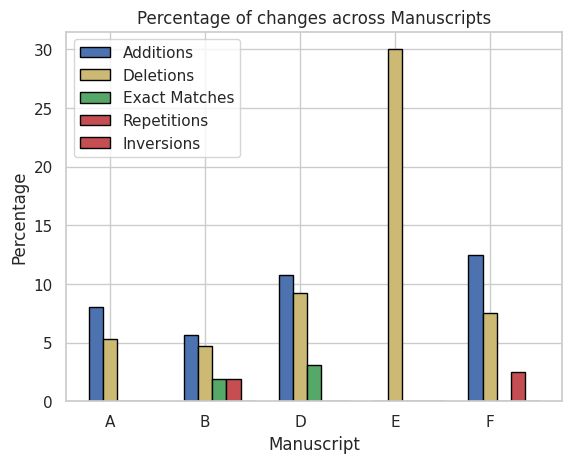

In [14]:
Additions = [word_addition_per(df) for file,df in dfs]
Deletions = [word_deletion_per(df) for file,df in dfs]
Exact_matches = [exact_match_per(df) for file,df in dfs]
Repetitions = [word_repitition_per(df) for file,df in dfs]
Inversions = [inversion_per(df) for file,df in dfs]

n=5
r = np.arange(n)
width = 0.15
  
  
plt.bar(r, Additions, color = 'b',
        width = width, edgecolor = 'black',
        label='Additions')

plt.bar(r + width, Deletions, color = 'y',
        width = width, edgecolor = 'black',
        label='Deletions')

plt.bar(r + 2*width, Exact_matches, color = 'g',
        width = width, edgecolor = 'black',
        label='Exact Matches')
  
plt.bar(r + 3*width, Repetitions, color = 'r',
        width = width, edgecolor = 'black',
        label='Repetitions')
  
plt.bar(r + 4*width, Inversions, color = 'r',
        width = width, edgecolor = 'black',
        label='Inversions')



plt.xlabel("Manuscript")
plt.ylabel("Percentage")
plt.title("Percentage of changes across Manuscripts")
  
# plt.grid(linestyle='--')
plt.xticks(r + width,['A','B','D','E', 'F'])
plt.legend()
  
plt.show()

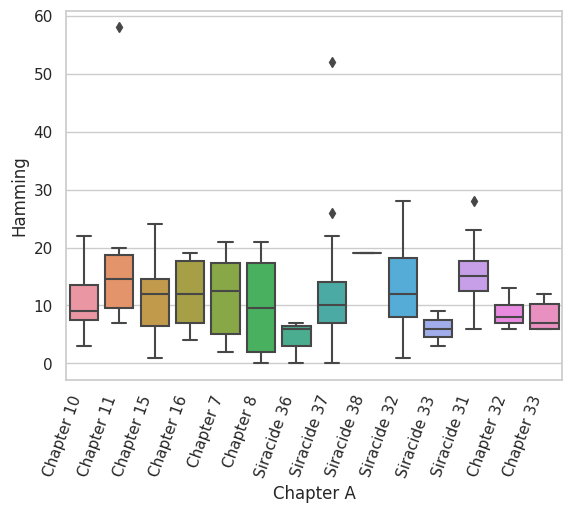

In [15]:
# Create boxplot for levenshtein distances based upon chapter
ax = sns.boxplot(x="Chapter A", y="Hamming", data=df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.show()

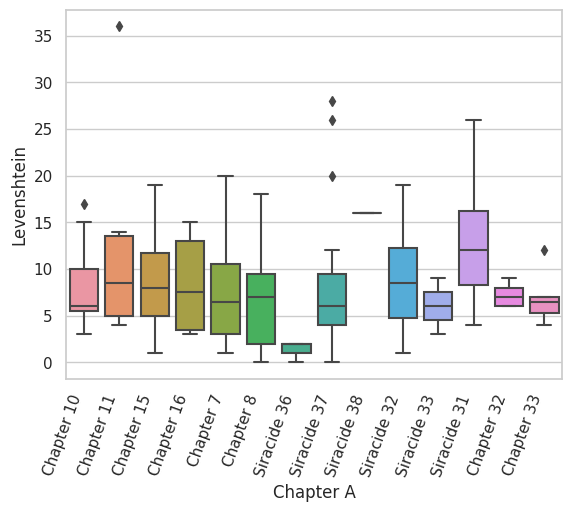

In [16]:
# Create boxplot for levenshtein distances based upon chapter
ax = sns.boxplot(x="Chapter A", y="Levenshtein", data=df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.show()

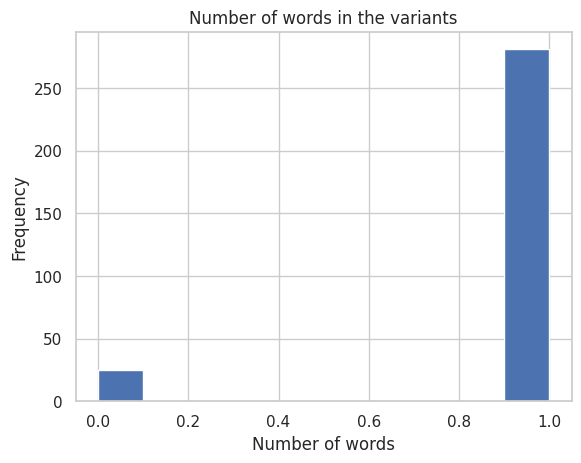

In [17]:
# Make a histogram for the the number of words in the 
# Concatenate 'Column1' and 'Column2' into a single new DataFrame
new_df = pd.concat([df['Length A'], df['Length B']], ignore_index=True)
plt.hist(new_df)
plt.title('Number of words in the variants')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()